In [38]:
import pandas as pd

df = pd.read_csv('data_to_cluster.csv',sep=';')
df.head()

,Id,Age,Gender,Geographic location,Marital status,Education level,Occupation,Occupation level,Individual income level,Customer Lifetime Value (CLV)
0,1,43,1,3,1,1,1,2,5,851
1,2,59,1,1,1,2,3,3,5,2476
2,3,18,0,3,0,2,2,3,1,442
3,4,65,1,1,1,1,3,2,3,5186
4,5,39,1,2,1,1,3,2,3,3466


In [39]:
df = df.iloc[:, 1:]
df.head()

,Age,Gender,Geographic location,Marital status,Education level,Occupation,Occupation level,Individual income level,Customer Lifetime Value (CLV)
0,43,1,3,1,1,1,2,5,851
1,59,1,1,1,2,3,3,5,2476
2,18,0,3,0,2,2,3,1,442
3,65,1,1,1,1,3,2,3,5186
4,39,1,2,1,1,3,2,3,3466


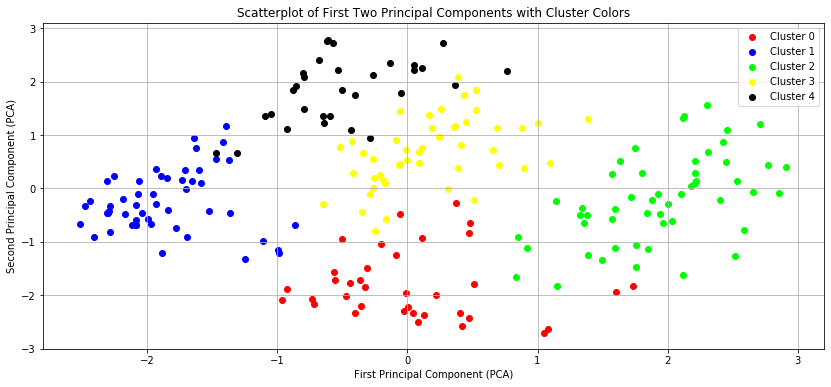

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



X = df.iloc[:, 1:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_


cluster_colors = ['red', 'blue', 'lime', 'yellow', 'black']

plt.figure(figsize=(14, 6))
for cluster in range(num_clusters):
    plt.scatter(X_pca[df['Cluster'] == cluster][:, 0], 
                X_pca[df['Cluster'] == cluster][:, 1],
                label=f'Cluster {cluster}',
                color=cluster_colors[cluster])  

plt.title('Scatterplot of First Two Principal Components with Cluster Colors')
plt.xlabel('First Principal Component (PCA)')
plt.ylabel('Second Principal Component (PCA)')
plt.legend()
plt.grid(True)

plt.show()


In [41]:
cluster_means = df.groupby('Cluster').mean().round(0)

styled_cluster_means = cluster_means.style.set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])


styled_cluster_means

,Age,Gender,Geographic location,Marital status,Education level,Occupation,Occupation level,Individual income level,Customer Lifetime Value (CLV)
Cluster,,,,,,,,,
0,56,0,2,1,2,1,2,4,3276
1,27,1,2,0,2,2,2,2,1318
2,49,0,2,1,2,3,3,4,3224
3,55,1,2,1,2,3,1,5,5192
4,49,1,3,1,2,3,2,2,1619
